# Support Vector Machine Classifier

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

### UCI Machine Learning Repository (Wine Data)
###### Obtained from: https://archive.ics.uci.edu/ml/datasets/Wine/


# Task:
1. To classify wine based on the its attributes
2. The data has 13 attributes with one class label (first column in dataframe)
2. In this notebook, we will be making use of the two features only 
        a. Alcohol content
        b. Malic acidity

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' 
df = pd.read_csv(data_url, parse_dates=True, sep=',', header=None)

df.columns = ['y'] + ['X' + str(j) for j in range(1, len(df.columns.to_list()))]
df

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
X = df.iloc[:, 1:].values[:, :2]
y = df.iloc[:, 0].values
X.shape

(178, 2)

## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model 

In [6]:
classifier = SVC(kernel ='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Predicting a new result

In [7]:
print(classifier.predict(sc.transform([X_test[5]])))

[2]


## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  2]
 [ 0 19  2]
 [ 2  0  6]]


0.8666666666666667

## Visualising the Test set results

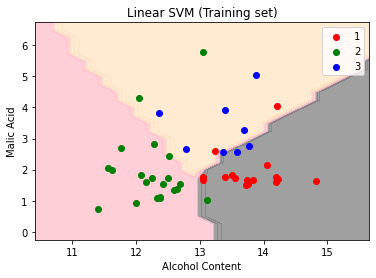

In [10]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gray', 'pink', 'bisque')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Linear SVM (Training set)')
plt.xlabel('Alcohol Content')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

## SVM with Radial Basis Function

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel ='rbf', gamma=1, C=4)
classifier.fit(X_train, y_train)

SVC(C=4, gamma=1)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  1]
 [ 0 20  1]
 [ 0  1  7]]


0.9333333333333333

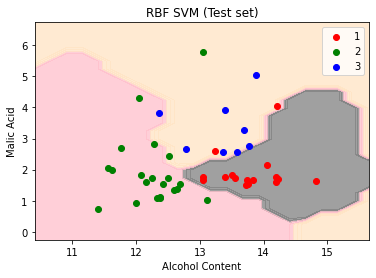

In [14]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gray', 'pink', 'bisque')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RBF SVM (Test set)')
plt.xlabel('Alcohol Content')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()